# Tennis Play Prediction : Decision Tree ML Model : also known as
- ID3 (Iterative Dichotomiser 3)
- CART (Classification and Regression Trees)

In [ ]:
# Designed By : ALTAF HUSAIN DATA ANALYST

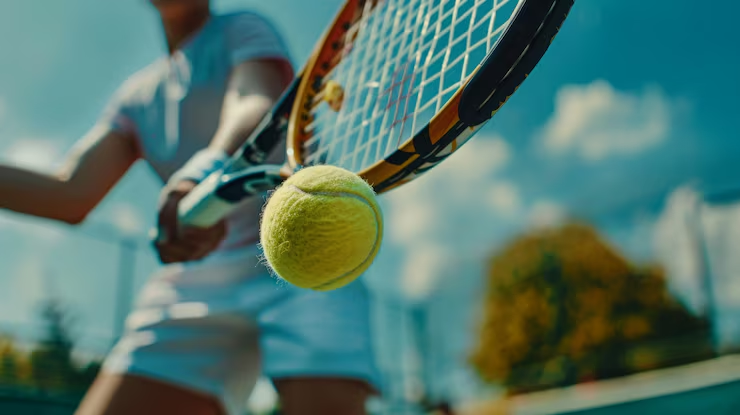

# Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
warnings.filterwarnings('ignore')
print("All modules loaded succesfully")

All modules loaded succesfully


# load data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fredericobreno/play-tennis")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████████| 337/337 [00:00<00:00, 94.7kB/s]

Extracting files...
Path to dataset files: C:\Users\SK COMPUTER\.cache\kagglehub\datasets\fredericobreno\play-tennis\versions\1


In [4]:
path

'C:\\Users\\SK COMPUTER\\.cache\\kagglehub\\datasets\\fredericobreno\\play-tennis\\versions\\1'

In [5]:
import os
file_path = path + '/'+os.listdir(path)[0]

In [6]:
file_path

'C:\\Users\\SK COMPUTER\\.cache\\kagglehub\\datasets\\fredericobreno\\play-tennis\\versions\\1/play_tennis.csv'

In [7]:
df = pd.read_csv(file_path)

In [8]:
df.pop('day')
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


# EDA

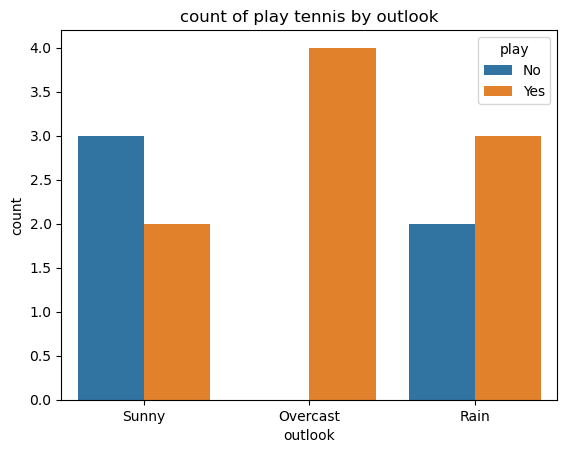

In [9]:
plt.title('count of play tennis by outlook')
sns.countplot(df,x = 'outlook', hue = 'play')
plt.show()

In [10]:
x_col = df.columns[:-1]
x_col

Index(['outlook', 'temp', 'humidity', 'wind'], dtype='object')

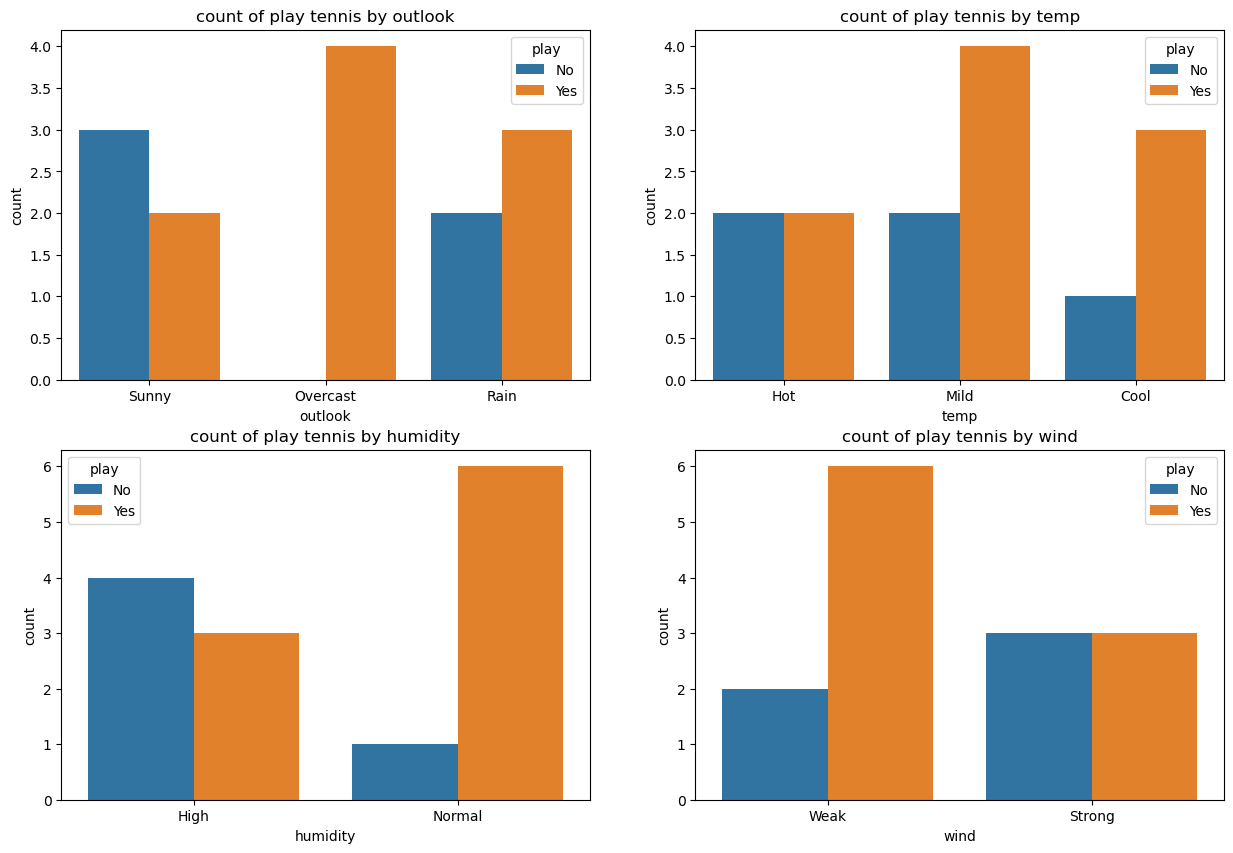

In [11]:
plt.figure(figsize = (15,10))
for  i,j in enumerate(x_col):
  plt.subplot(2,2,i+1)
  plt.title(f'count of play tennis by {j}')
  sns.countplot(df,x = j,hue = 'play')
plt.show()

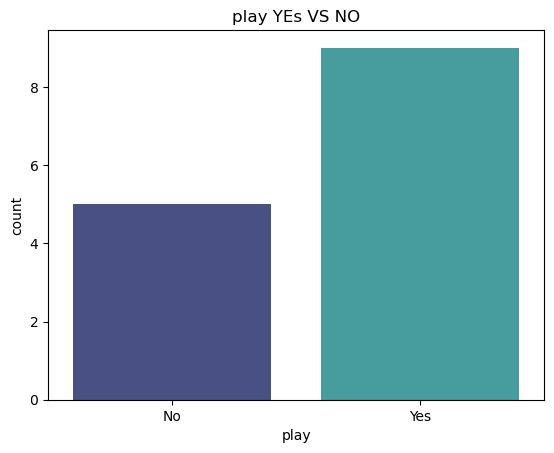

In [12]:
plt.title('play YEs VS NO')
sns.countplot(df,x = 'play', hue = 'play',palette=sns.color_palette('mako',2))
plt.show()

In [13]:
df.shape

(14, 5)

# Data Preprocessiong

In [14]:
X = pd.get_dummies(df.iloc[:,:-1],drop_first = True,dtype = int)

In [15]:
X

,outlook_Rain,outlook_Sunny,temp_Hot,temp_Mild,humidity_Normal,wind_Weak
0,0,1,1,0,0,1
1,0,1,1,0,0,0
2,0,0,1,0,0,1
3,1,0,0,1,0,1
4,1,0,0,0,1,1
5,1,0,0,0,1,0
6,0,0,0,0,1,0
7,0,1,0,1,0,1
8,0,1,0,0,1,1
9,1,0,0,1,1,1


In [16]:
y = df['play'].map({'No':0,'Yes':1})
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [17]:
X.shape

(14, 6)

In [18]:
y.shape

(14,)

# Train test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11, 6)
(3, 6)
(11,)
(3,)


# Model Building

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)

In [24]:
compare_df = pd.DataFrame({'Actyal Y':y_test,'Predicted Y':y_pred})

In [25]:
model.score(X_test,y_test)

0.3333333333333333

# Multiple Model Evalution

In [26]:
model_dict = {'Model No':[],'Model Brain':[],'Model score':[]}

for i in range(1,3000+1):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=i)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test,y_test)

    model_dict['Model No'].append(i)
    model_dict['Model Brain'].append(model)
    model_dict['Model score'].append(score)
    print(f'checking {i} <> score : {score*100}')
    if score *100 >=90:
      print('Model Developed successfully!!')
      break
    display(clear = True)

checking 3 <> score : 100.0
Model Developed successfully!!


In [27]:
all_model_df = pd.DataFrame(model_dict)

In [28]:
all_model_df

,Model No,Model Brain,Model score
0,1,DecisionTreeClassifier(),0.333333
1,2,DecisionTreeClassifier(),0.333333
2,3,DecisionTreeClassifier(),1.000000


In [29]:
final_model_df= all_model_df[all_model_df['Model score'] == all_model_df['Model score'] .max()]

In [30]:
final_model_df

,Model No,Model Brain,Model score
2,3,DecisionTreeClassifier(),1.0


In [31]:
final_model = final_model_df['Model Brain'].values[0]

In [32]:
final_model

DecisionTreeClassifier()

In [33]:
final_model.score(X_test,y_test)

1.0

In [34]:
y_pred = final_model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2, 0],
       [0, 1]])

In [37]:
cm.ravel()

array([2, 0, 0, 1])

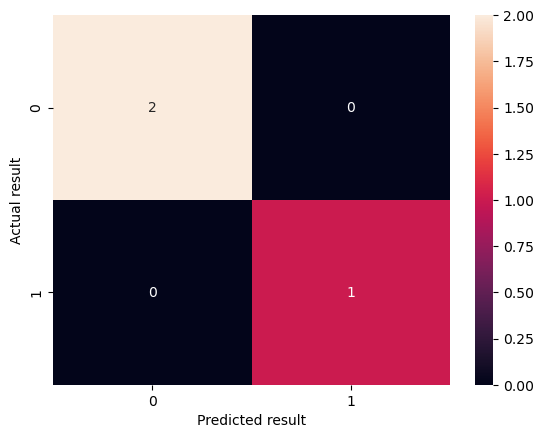

In [38]:
sns.heatmap(cm,annot =True)
plt.xlabel('Predicted result')
plt.ylabel('Actual result')
plt.show()

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



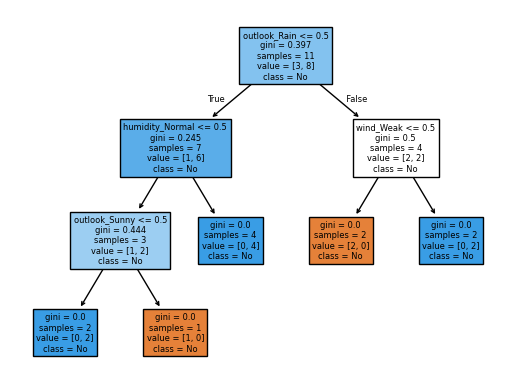

In [40]:
plt.title('Dicision tree model')
plot_tree(final_model,class_names=df['play'],filled = True,feature_names= X.columns)
plt.show()

In [41]:
# iris,cancer,wineQuality,digits

#  Predict user input Value

In [42]:
df.iloc[:,:-1].sample()

,outlook,temp,humidity,wind
9,Rain,Mild,Normal,Weak


In [43]:
for i in df:
  print(df[i].unique())
  print('--------------')

['Sunny' 'Overcast' 'Rain']
--------------
['Hot' 'Mild' 'Cool']
--------------
['High' 'Normal']
--------------
['Weak' 'Strong']
--------------
['No' 'Yes']
--------------


In [45]:
outlook = input("Enter Outlook (Sunny/Overcast/Rain): ").capitalize()
temp = input("Enter Temperature (Hot/Mild/Cool): ").capitalize()
humidity = input("Enter Humidity (High/Normal): ").capitalize()
wind = input("Enter Wind (Weak/Strong): ").capitalize()

all_features = pd.DataFrame([[outlook, temp, humidity, wind]],
                            columns=df.iloc[:, :-1].columns,
                            index=[df.shape[0]])

final_features = pd.DataFrame (pd.get_dummies(pd.concat([df.iloc[:, :-1], all_features], axis=0),
                                drop_first=True,dtype = int).iloc[-1, :]).T

final_ans = model.predict(final_features)
print('Tennis Play NO ❌')if final_ans == 0 else print('Tennis Play YES ✅')


Enter Outlook (Sunny/Overcast/Rain):  rain
Enter Temperature (Hot/Mild/Cool):  cool
Enter Humidity (High/Normal):  high
Enter Wind (Weak/Strong):  weak


Tennis Play YES ✅


In [ ]:
# Designed By : ALTAF HUSAIN DATA ANALYST